In [1]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

c:\Users\Zephyrus\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Zephyrus\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
c:\Users\Zephyrus\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:

# Database connection parameters
db_params = {
    'dbname': 'integration',
    'user': 'postgres',
    'password': '1234',
    'host': 'localhost',
    'port': '5432'
}


In [3]:
# Establishing the connection
conn = psycopg2.connect(**db_params)

# Define your SQL query
query = "SELECT * FROM db_events;"

# Execute the query and store the result in a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Display the DataFrame
print(df.head())

C:\Users\Zephyrus\AppData\Local\Temp\ipykernel_2636\3958174467.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


   duracion       fecha  hora  esquema                tabla  \
0        38  2024-06-01     0  sat_fel  p_dte_emisor_gtq_ag   
1        42  2024-06-01     0  sat_fel  p_dte_emisor_gtq_ag   
2        27  2024-06-01     0  sat_fel  p_dte_emisor_gtq_ag   
3        15  2024-06-01     0  sat_fel  p_dte_emisor_gtq_ag   
4        21  2024-06-01     0  sat_fel  p_dte_emisor_gtq_ag   

                                    app  Day of month  ID Day of week  \
0  2ff814a6-3304-4ab8-85cb-cd0e6f879c1d             1               7   
1  2ff814a6-3304-4ab8-85cb-cd0e6f879c1d             1               7   
2  2ff814a6-3304-4ab8-85cb-cd0e6f879c1d             1               7   
3  2ff814a6-3304-4ab8-85cb-cd0e6f879c1d             1               7   
4  2ff814a6-3304-4ab8-85cb-cd0e6f879c1d             1               7   

  Day of week    mean_st  ...  rango_final_by_table  tamañano_resp_by_table  \
0      sábado  28.165406  ...          7.980910e+07            2.439692e+06   
1      sábado  28.165406

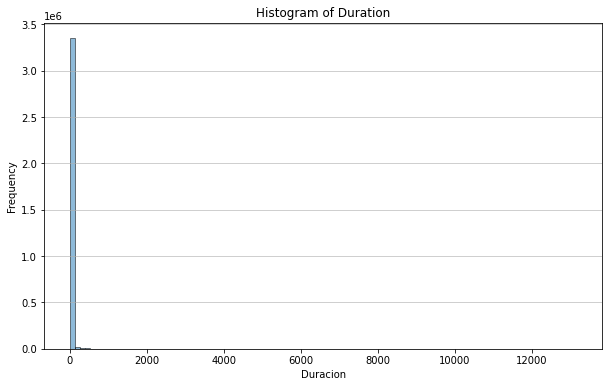

In [4]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['duracion'], bins=100, edgecolor='black', alpha=0.5)
plt.title('Histogram of Duration')
plt.xlabel('Duracion')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

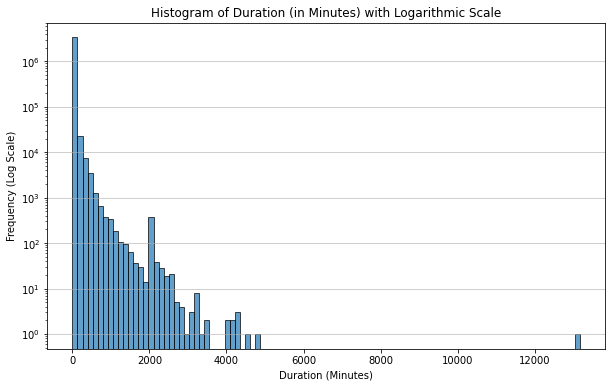

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(df['duracion'], bins=100, edgecolor='black', alpha=0.7)
plt.yscale('log')  # Apply logarithmic scale to the y-axis
plt.title('Histogram of Duration (in Minutes) with Logarithmic Scale')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Frequency (Log Scale)')
plt.grid(axis='y', alpha=0.75)


plt.show()

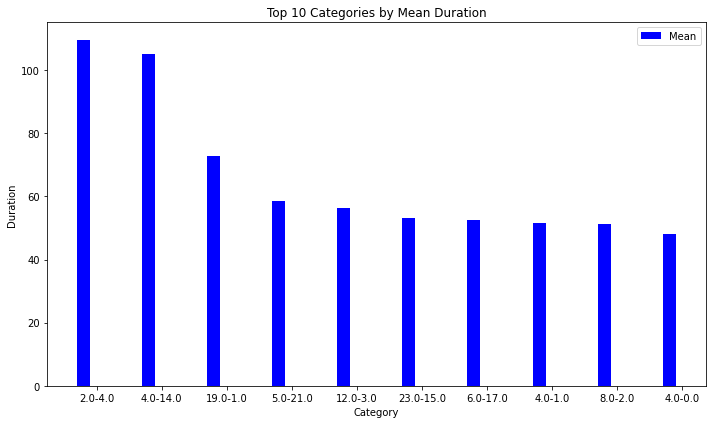

In [6]:
# Calculate mean, max, and min durations for each category
category_stats = df.groupby(['Day of month', 'hora'])['duracion'].agg(['mean']).reset_index()


# Get the top 5 categories by mean duration
top_5_categories = category_stats.nlargest(10, 'mean')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Create bar plots for mean, max, and min durations
x = top_5_categories.apply(lambda row: f"{row['Day of month']}-{row['hora']}", axis=1)
mean_values = top_5_categories['mean']

bar_width = 0.2
x_indices = range(len(top_5_categories))

ax.bar(x_indices, mean_values, width=bar_width, label='Mean', color='b')

# Labeling the bars
ax.set_xlabel('Category')
ax.set_ylabel('Duration')
ax.set_title('Top 10 Categories by Mean Duration')
ax.set_xticks([i + bar_width for i in x_indices])
ax.set_xticklabels(x)

ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

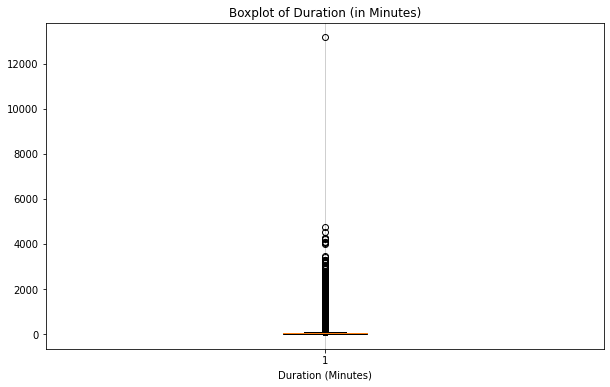

In [7]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['duracion'], vert=True, patch_artist=True)
plt.title('Boxplot of Duration (in Minutes)')
plt.xlabel('Duration (Minutes)')
plt.grid(axis='x', alpha=0.75)
plt.show()

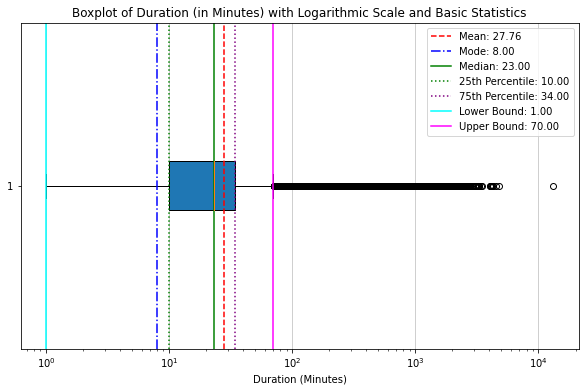

In [8]:
mean_duration = df['duracion'].mean()
mode_duration = stats.mode(df['duracion'])[0][0]
median = df['duracion'].median()
quantiles = df['duracion'].quantile([0.25, 0.5, 0.75])

# Calculate the IQR
IQR = quantiles[0.75] - quantiles[0.25]

# Calculate lower and upper bounds
lower_bound = 1 if quantiles[0.25] - 1.5 * IQR < 0 else quantiles[0.25] - 1.5 * IQR
upper_bound = quantiles[0.75] + 1.5 * IQR

# Plotting the boxplot with a logarithmic scale
plt.figure(figsize=(10, 6))
plt.boxplot(df['duracion'], vert=False, patch_artist=True)
plt.xscale('log')  # Apply logarithmic scale to the x-axis
plt.title('Boxplot of Duration (in Minutes) with Logarithmic Scale and Basic Statistics')
plt.xlabel('Duration (Minutes)')

# Add lines for mean and mode
plt.axvline(mean_duration, color='red', linestyle='--', label=f'Mean: {mean_duration:.2f}')
plt.axvline(mode_duration, color='blue', linestyle='-.', label=f'Mode: {mode_duration:.2f}')
plt.axvline(median, color='green', linestyle='-', label=f'Median: {median:.2f}')
plt.axvline(quantiles[0.25], color='green', linestyle=':', label=f'25th Percentile: {quantiles[0.25]:.2f}')
plt.axvline(quantiles[0.75], color='purple', linestyle=':', label=f'75th Percentile: {quantiles[0.75]:.2f}')
plt.axvline(lower_bound, color='cyan', linestyle='-', label=f'Lower Bound: {lower_bound:.2f}')
plt.axvline(upper_bound, color='magenta', linestyle='-', label=f'Upper Bound: {upper_bound:.2f}')


# Add legend
plt.legend()

# Add grid
plt.grid(axis='x', alpha=0.75)

# Display the plot
plt.show()

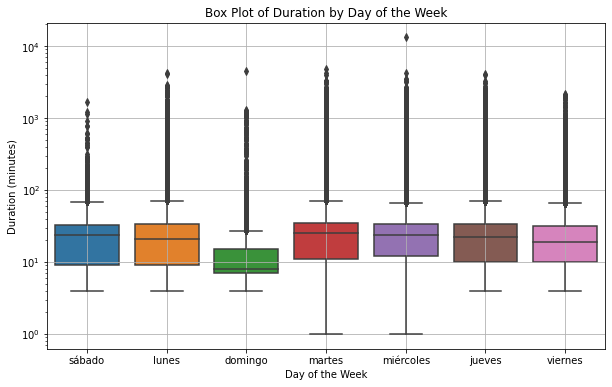

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Day of week', y='duracion', data=df)
plt.yscale('log')
plt.title('Box Plot of Duration by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Duration (minutes)')
plt.grid(True)
plt.show()

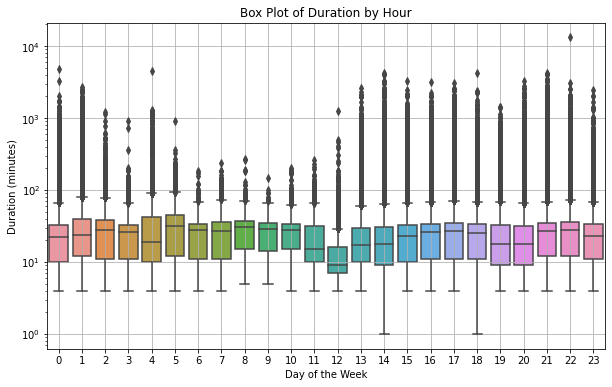

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='hora', y='duracion', data=df)
plt.yscale('log')
plt.title('Box Plot of Duration by Hour')
plt.xlabel('Day of the Week')
plt.ylabel('Duration (minutes)')
plt.grid(True)
plt.show()

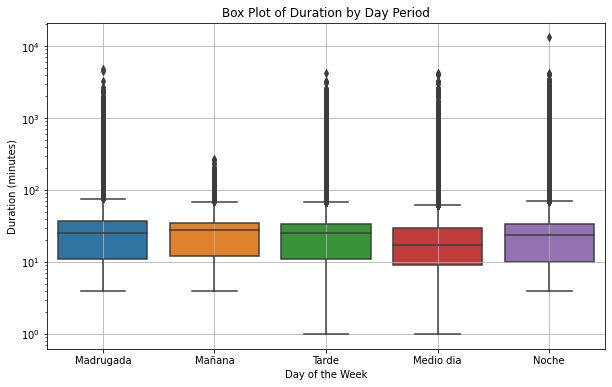

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Evento del Dia', y='duracion', data=df)
plt.yscale('log')
plt.title('Box Plot of Duration by Day Period')
plt.xlabel('Day of the Week')
plt.ylabel('Duration (minutes)')
plt.grid(True)
plt.show()

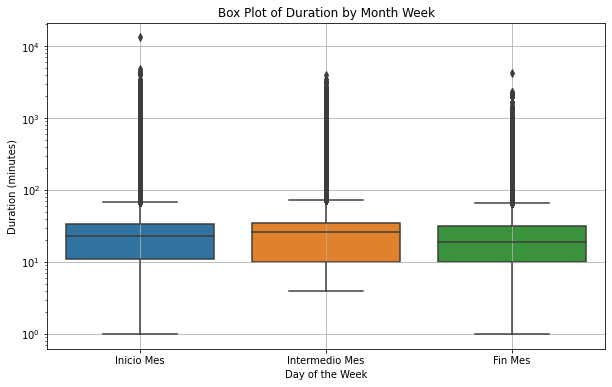

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Periodo Del Mes', y='duracion', data=df)
plt.yscale('log')
plt.title('Box Plot of Duration by Month Week')
plt.xlabel('Day of the Week')
plt.ylabel('Duration (minutes)')
plt.grid(True)
plt.show()

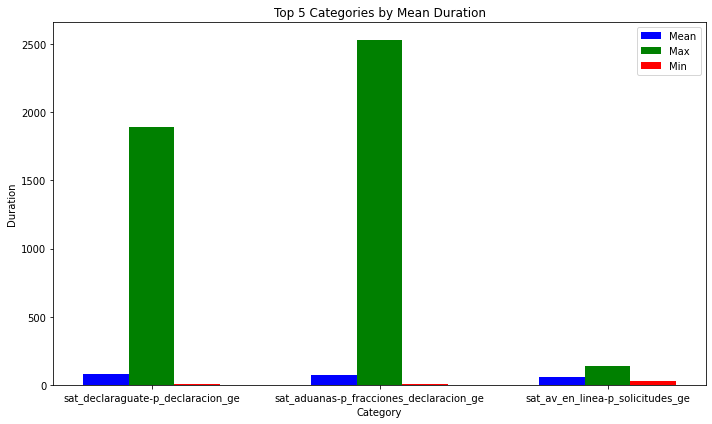

In [13]:
# Calculate mean, max, and min durations for each category
category_stats = df.groupby(['esquema', 'tabla'])['duracion'].agg(['mean', 'max', 'min']).reset_index()


# Get the top 5 categories by mean duration
top_5_categories = category_stats.nlargest(3, 'mean')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Create bar plots for mean, max, and min durations
x = top_5_categories.apply(lambda row: f"{row['esquema']}-{row['tabla']}", axis=1)
mean_values = top_5_categories['mean']
max_values = top_5_categories['max']
min_values = top_5_categories['min']

bar_width = 0.2
x_indices = range(len(top_5_categories))

ax.bar(x_indices, mean_values, width=bar_width, label='Mean', color='b')
ax.bar([i + bar_width for i in x_indices], max_values, width=bar_width, label='Max', color='g')
ax.bar([i + 2 * bar_width for i in x_indices], min_values, width=bar_width, label='Min', color='r')

# Labeling the bars
ax.set_xlabel('Category')
ax.set_ylabel('Duration')
ax.set_title('Top 5 Categories by Mean Duration')
ax.set_xticks([i + bar_width for i in x_indices])
ax.set_xticklabels(x)

ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

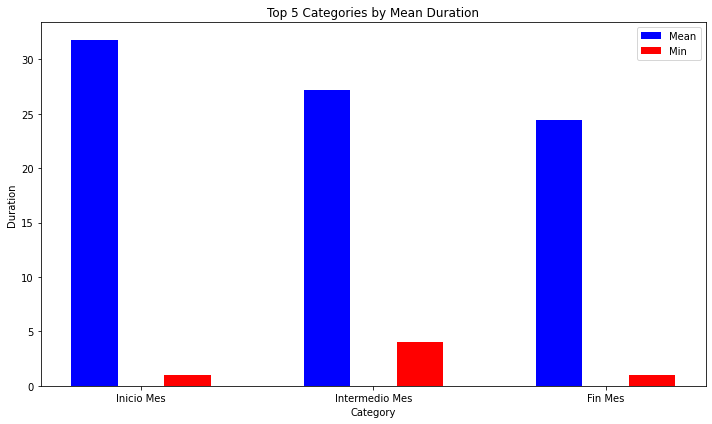

In [14]:
# Calculate mean, max, and min durations for each category
category_stats = df.groupby('Periodo Del Mes')['duracion'].agg(['mean','min']).reset_index()


# Get the top 5 categories by mean duration
top_5_categories = category_stats.nlargest(5, 'mean')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Create bar plots for mean, max, and min durations
x = top_5_categories['Periodo Del Mes']
mean_values = top_5_categories['mean']
min_values = top_5_categories['min']

bar_width = 0.2
x_indices = range(len(top_5_categories))

ax.bar(x_indices, mean_values, width=bar_width, label='Mean', color='b')
ax.bar([i + 2 * bar_width for i in x_indices], min_values, width=bar_width, label='Min', color='r')

# Labeling the bars
ax.set_xlabel('Category')
ax.set_ylabel('Duration')
ax.set_title('Top 5 Categories by Mean Duration')
ax.set_xticks([i + bar_width for i in x_indices])
ax.set_xticklabels(x)

ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

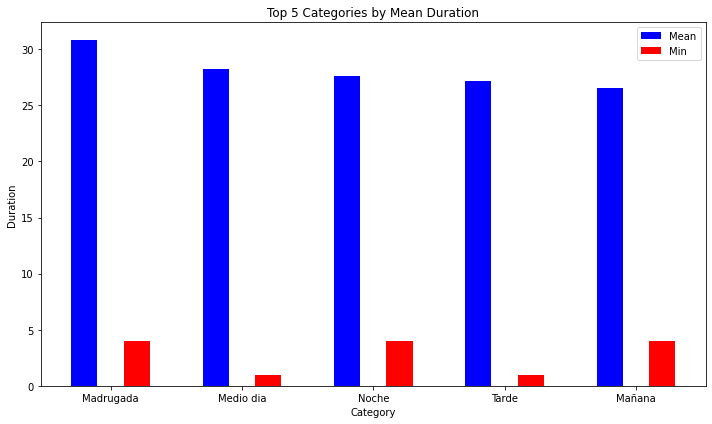

In [15]:
# Calculate mean, max, and min durations for each category
category_stats = df.groupby('Evento del Dia')['duracion'].agg(['mean', 'min']).reset_index()


# Get the top 5 categories by mean duration
top_5_categories = category_stats.nlargest(5, 'mean')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Create bar plots for mean, max, and min durations
x = top_5_categories['Evento del Dia']
mean_values = top_5_categories['mean']
min_values = top_5_categories['min']

bar_width = 0.2
x_indices = range(len(top_5_categories))

ax.bar(x_indices, mean_values, width=bar_width, label='Mean', color='b')
ax.bar([i + 2 * bar_width for i in x_indices], min_values, width=bar_width, label='Min', color='r')

# Labeling the bars
ax.set_xlabel('Category')
ax.set_ylabel('Duration')
ax.set_title('Top 5 Categories by Mean Duration')
ax.set_xticks([i + bar_width for i in x_indices])
ax.set_xticklabels(x)

ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

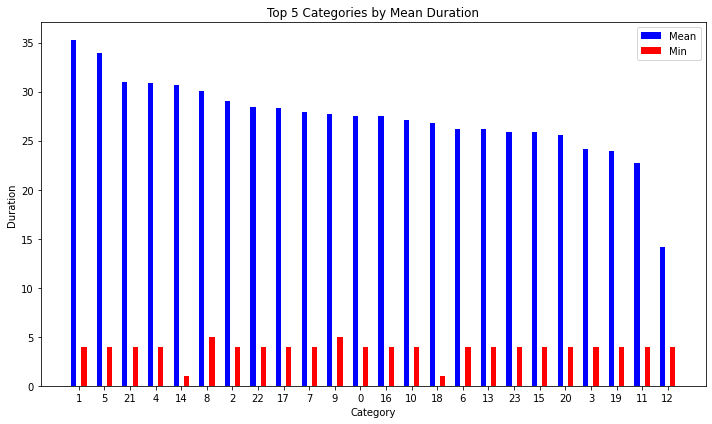

In [16]:
# Calculate mean, max, and min durations for each category
category_stats = df.groupby('hora')['duracion'].agg(['mean','min']).reset_index()


# Get the top 5 categories by mean duration
top_5_categories = category_stats.nlargest(24, 'mean')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Create bar plots for mean, max, and min durations
x = top_5_categories['hora']
mean_values = top_5_categories['mean']
min_values = top_5_categories['min']

bar_width = 0.2
x_indices = range(len(top_5_categories))

ax.bar(x_indices, mean_values, width=bar_width, label='Mean', color='b')
ax.bar([i + 2 * bar_width for i in x_indices], min_values, width=bar_width, label='Min', color='r')

# Labeling the bars
ax.set_xlabel('Category')
ax.set_ylabel('Duration')
ax.set_title('Top 5 Categories by Mean Duration')
ax.set_xticks([i + bar_width for i in x_indices])
ax.set_xticklabels(x)

ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

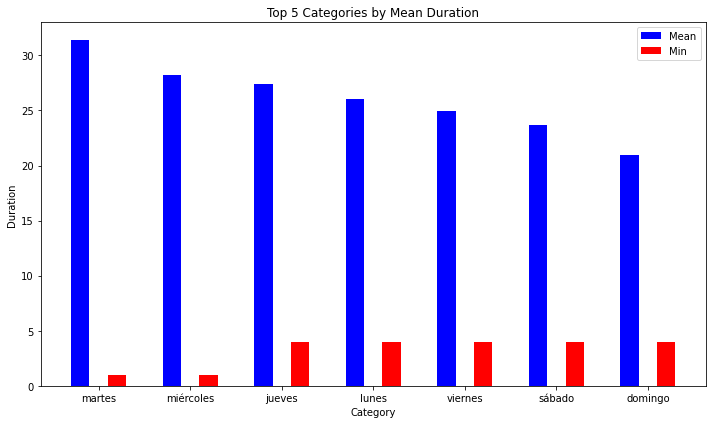

In [17]:
# Calculate mean, max, and min durations for each category
category_stats = df.groupby('Day of week')['duracion'].agg(['mean', 'min']).reset_index()


# Get the top 5 categories by mean duration
top_5_categories = category_stats.nlargest(7, 'mean')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Create bar plots for mean, max, and min durations
x = top_5_categories['Day of week']
mean_values = top_5_categories['mean']
min_values = top_5_categories['min']

bar_width = 0.2
x_indices = range(len(top_5_categories))

ax.bar(x_indices, mean_values, width=bar_width, label='Mean', color='b')
ax.bar([i + 2 * bar_width for i in x_indices], min_values, width=bar_width, label='Min', color='r')

# Labeling the bars
ax.set_xlabel('Category')
ax.set_ylabel('Duration')
ax.set_title('Top 5 Categories by Mean Duration')
ax.set_xticks([i + bar_width for i in x_indices])
ax.set_xticklabels(x)

ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

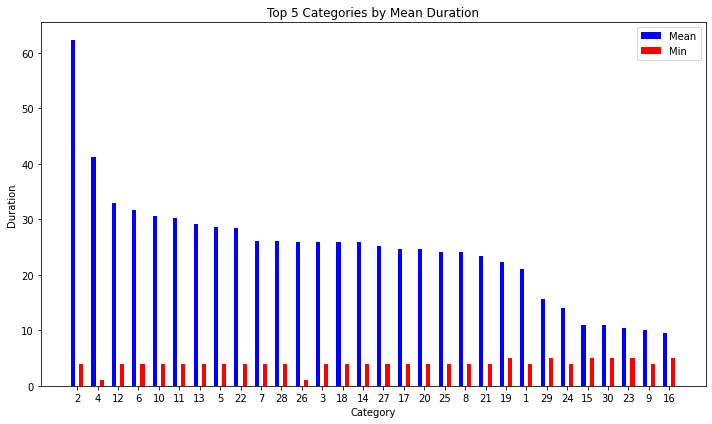

In [18]:
# Calculate mean, max, and min durations for each category
category_stats = df.groupby('Day of month')['duracion'].agg(['mean', 'min']).reset_index()


# Get the top 5 categories by mean duration
top_5_categories = category_stats.nlargest(30, 'mean')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Create bar plots for mean, max, and min durations
x = top_5_categories['Day of month']
mean_values = top_5_categories['mean']
min_values = top_5_categories['min']

bar_width = 0.2
x_indices = range(len(top_5_categories))

ax.bar(x_indices, mean_values, width=bar_width, label='Mean', color='b')
ax.bar([i + 2 * bar_width for i in x_indices], min_values, width=bar_width, label='Min', color='r')

# Labeling the bars
ax.set_xlabel('Category')
ax.set_ylabel('Duration')
ax.set_title('Top 5 Categories by Mean Duration')
ax.set_xticks([i + bar_width for i in x_indices])
ax.set_xticklabels(x)

ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

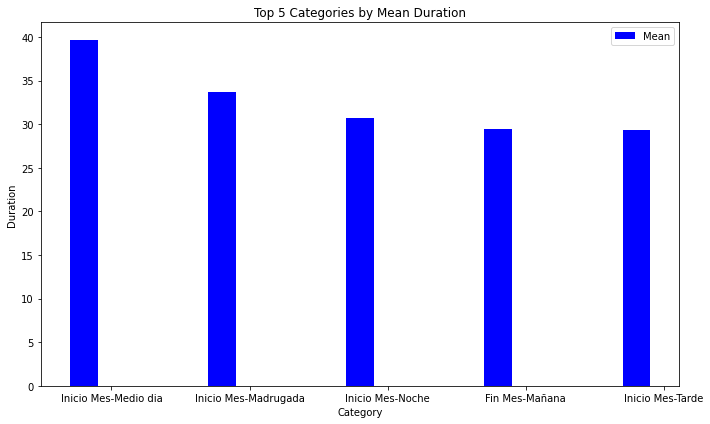

In [19]:
# Calculate mean, max, and min durations for each category
category_stats = df.groupby(['Periodo Del Mes', 'Evento del Dia'])['duracion'].agg(['mean']).reset_index()


# Get the top 5 categories by mean duration
top_5_categories = category_stats.nlargest(5, 'mean')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Create bar plots for mean, max, and min durations
x = top_5_categories.apply(lambda row: f"{row['Periodo Del Mes']}-{row['Evento del Dia']}", axis=1)
mean_values = top_5_categories['mean']

bar_width = 0.2
x_indices = range(len(top_5_categories))

ax.bar(x_indices, mean_values, width=bar_width, label='Mean', color='b')

# Labeling the bars
ax.set_xlabel('Category')
ax.set_ylabel('Duration')
ax.set_title('Top 5 Categories by Mean Duration')
ax.set_xticks([i + bar_width for i in x_indices])
ax.set_xticklabels(x)

ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

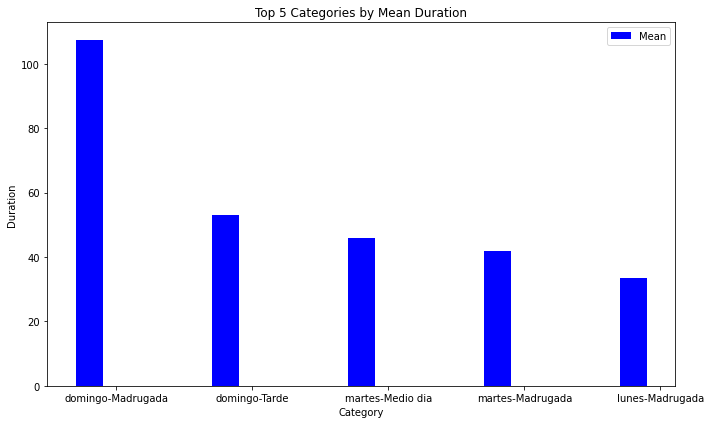

In [20]:
# Calculate mean, max, and min durations for each category
category_stats = df.groupby(['Day of week', 'Evento del Dia'])['duracion'].agg(['mean']).reset_index()


# Get the top 5 categories by mean duration
top_5_categories = category_stats.nlargest(5, 'mean')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Create bar plots for mean, max, and min durations
x = top_5_categories.apply(lambda row: f"{row['Day of week']}-{row['Evento del Dia']}", axis=1)
mean_values = top_5_categories['mean']

bar_width = 0.2
x_indices = range(len(top_5_categories))

ax.bar(x_indices, mean_values, width=bar_width, label='Mean', color='b')

# Labeling the bars
ax.set_xlabel('Category')
ax.set_ylabel('Duration')
ax.set_title('Top 5 Categories by Mean Duration')
ax.set_xticks([i + bar_width for i in x_indices])
ax.set_xticklabels(x)

ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

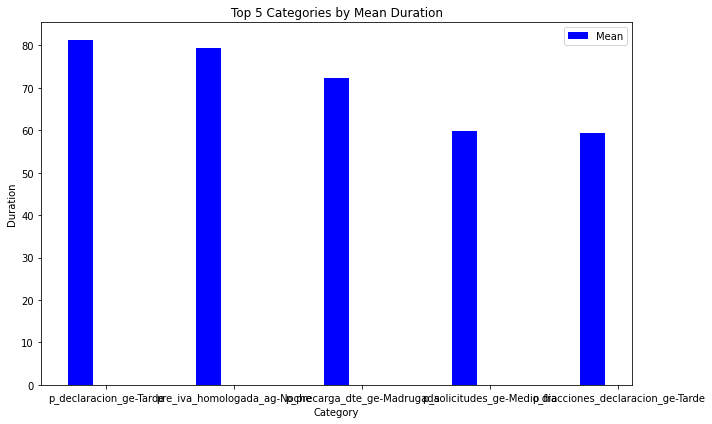

In [21]:
# Calculate mean, max, and min durations for each category
category_stats = df.groupby(['tabla', 'Evento del Dia'])['duracion'].agg(['mean']).reset_index()


# Get the top 5 categories by mean duration
top_5_categories = category_stats.nlargest(5, 'mean')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Create bar plots for mean, max, and min durations
x = top_5_categories.apply(lambda row: f"{row['tabla']}-{row['Evento del Dia']}", axis=1)
mean_values = top_5_categories['mean']

bar_width = 0.2
x_indices = range(len(top_5_categories))

ax.bar(x_indices, mean_values, width=bar_width, label='Mean', color='b')

# Labeling the bars
ax.set_xlabel('Category')
ax.set_ylabel('Duration')
ax.set_title('Top 5 Categories by Mean Duration')
ax.set_xticks([i + bar_width for i in x_indices])
ax.set_xticklabels(x)

ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

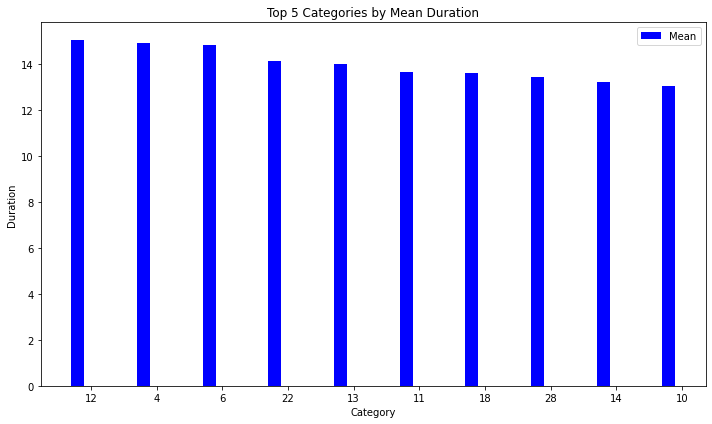

In [37]:
# Calculate mean, max, and min durations for each category
category_stats = df.groupby('Day of month')['latencia_by_day_month'].agg(['mean']).reset_index()


# Get the top 5 categories by mean duration
top_5_categories = category_stats.nlargest(10, 'mean')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Create bar plots for mean, max, and min durations
x = top_5_categories['Day of month']
mean_values = top_5_categories['mean']

bar_width = 0.2
x_indices = range(len(top_5_categories))

ax.bar(x_indices, mean_values, width=bar_width, label='Mean', color='b')

# Labeling the bars
ax.set_xlabel('Category')
ax.set_ylabel('Duration')
ax.set_title('Top 5 Categories by Mean Duration')
ax.set_xticks([i + bar_width for i in x_indices])
ax.set_xticklabels(x)

ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

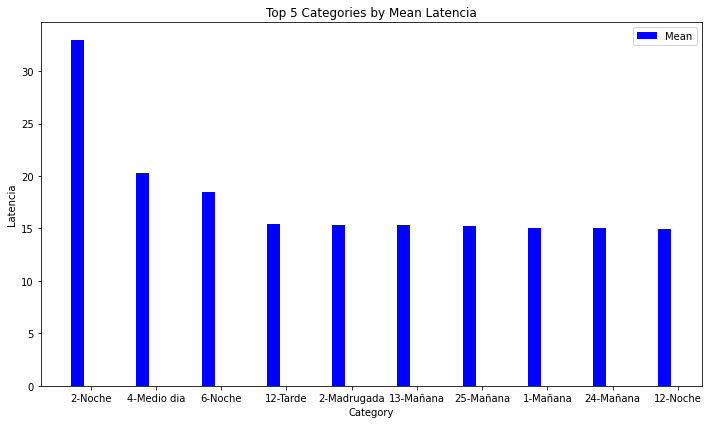

In [33]:
# Calculate mean, max, and min durations for each category
category_stats = df.groupby(['Day of month', 'Evento del Dia'])['latencia_by_day_month'].agg(['mean']).reset_index()


# Get the top 5 categories by mean duration
top_5_categories = category_stats.nlargest(10, 'mean')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Create bar plots for mean, max, and min durations
x = top_5_categories.apply(lambda row: f"{row['Day of month']}-{row['Evento del Dia']}", axis=1)
mean_values = top_5_categories['mean']

bar_width = 0.2
x_indices = range(len(top_5_categories))

ax.bar(x_indices, mean_values, width=bar_width, label='Mean', color='b')

# Labeling the bars
ax.set_xlabel('Category')
ax.set_ylabel('Latencia')
ax.set_title('Top 5 Categories by Mean Latencia')
ax.set_xticks([i + bar_width for i in x_indices])
ax.set_xticklabels(x)

ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

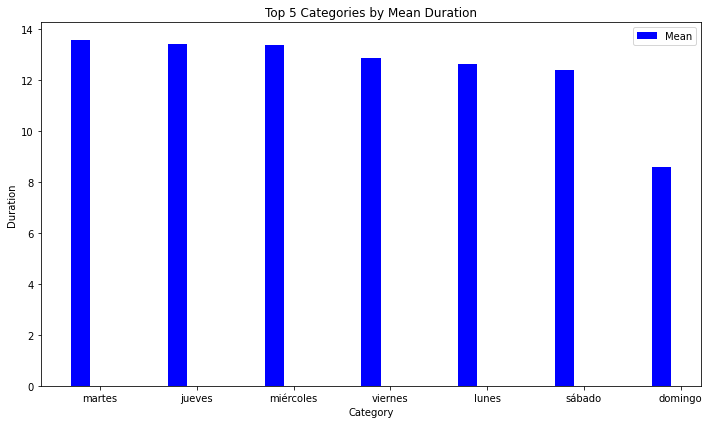

In [38]:
# Calculate mean, max, and min durations for each category
category_stats = df.groupby('Day of week')['latencia_by_day_week'].agg(['mean']).reset_index()


# Get the top 5 categories by mean duration
top_5_categories = category_stats.nlargest(10, 'mean')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Create bar plots for mean, max, and min durations
x = top_5_categories['Day of week']
mean_values = top_5_categories['mean']

bar_width = 0.2
x_indices = range(len(top_5_categories))

ax.bar(x_indices, mean_values, width=bar_width, label='Mean', color='b')

# Labeling the bars
ax.set_xlabel('Category')
ax.set_ylabel('Duration')
ax.set_title('Top 5 Categories by Mean Duration')
ax.set_xticks([i + bar_width for i in x_indices])
ax.set_xticklabels(x)

ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

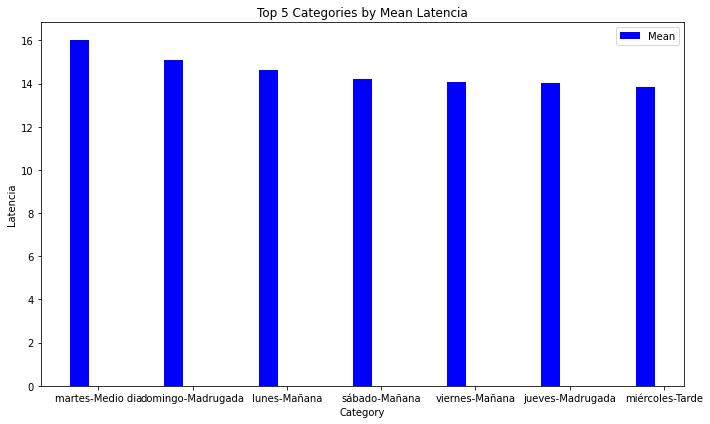

In [34]:
# Calculate mean, max, and min durations for each category
category_stats = df.groupby(['Day of week', 'Evento del Dia'])['latencia_by_day_week'].agg(['mean']).reset_index()


# Get the top 5 categories by mean duration
top_5_categories = category_stats.nlargest(7, 'mean')

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Create bar plots for mean, max, and min durations
x = top_5_categories.apply(lambda row: f"{row['Day of week']}-{row['Evento del Dia']}", axis=1)
mean_values = top_5_categories['mean']

bar_width = 0.2
x_indices = range(len(top_5_categories))

ax.bar(x_indices, mean_values, width=bar_width, label='Mean', color='b')

# Labeling the bars
ax.set_xlabel('Category')
ax.set_ylabel('Latencia')
ax.set_title('Top 5 Categories by Mean Latencia')
ax.set_xticks([i + bar_width for i in x_indices])
ax.set_xticklabels(x)

ax.legend()

# Show the plot
plt.tight_layout()
plt.show()